<a href="https://colab.research.google.com/github/dcpatton/Models-From-Scratch/blob/main/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import random

seed = 52
tf.random.set_seed(52)
random.seed(52)

tf.__version__

'2.3.0'

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
tf.keras.backend.clear_session()
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, Dense, AvgPool2D, Flatten

inp = Input(shape=(28,28,1))
x = Conv2D(6, 5, activation='tanh', padding='same', name='C1')(inp)
x = AvgPool2D(name='S2')(x)
x = Conv2D(16, 5, activation='tanh', name='C3')(x)
x = AvgPool2D(name='S4')(x)
x = Flatten()(x)
x = Dense(120, activation='tanh', name='C5')(x)
x = Dense(84, activation='tanh', name='F6')(x)
out = Dense(10, activation='softmax')(x)

model = Model(inputs=[inp], outputs=[out])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
C5 (Dense)                   (None, 120)              

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
es = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200, validation_split=0.2, callbacks=[es])

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1595 - acc: 0.9520 - val_loss: 0.0837 - val_acc: 0.9736
Epoch 2/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0710 - acc: 0.9780 - val_loss: 0.0602 - val_acc: 0.9817
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0513 - acc: 0.9838 - val_loss: 0.0627 - val_acc: 0.9808
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0418 - acc: 0.9869 - val_loss: 0.0606 - val_acc: 0.9825
Epoch 5/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0350 - acc: 0.9894 - val_loss: 0.0557 - val_acc: 0.9841
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0302 - acc: 0.9901 - val_loss: 0.0526 - val_acc: 0.9850
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0481 - val_acc: 0.9863
Epoch 8/200
1500/1500 [==============================] 

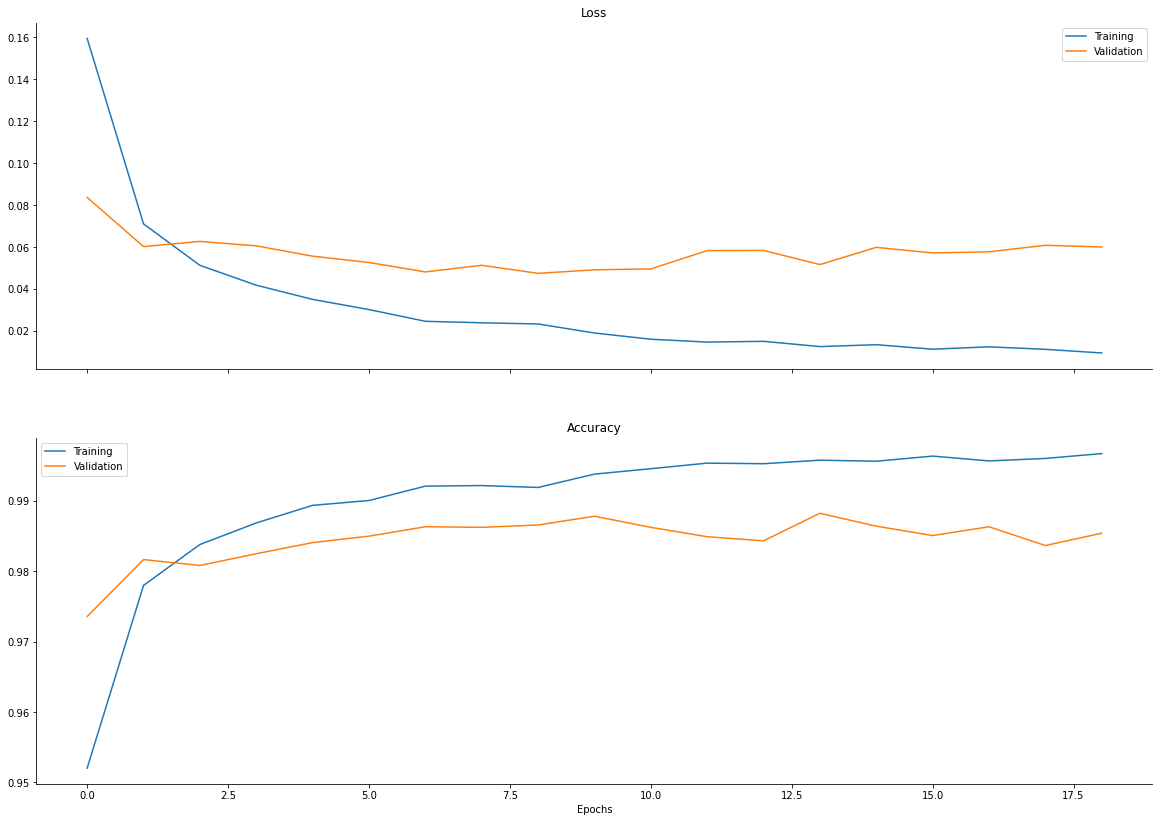

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

history = history.history

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Training')
ax1.plot(history['val_loss'], label='Validation')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label='Training')
ax2.plot(history['val_acc'], label='Validation')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0410 - acc: 0.9872


[0.0410226508975029, 0.9872000217437744]